<a href="https://colab.research.google.com/github/basithbahi/PCVK/blob/main/Week_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Nama: Abdul Basith Bahi
    NIM:  2141720177

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [15]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [16]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.jfif')
img_gray = cv.cvtColor(img,  cv.COLOR_BGR2GRAY)

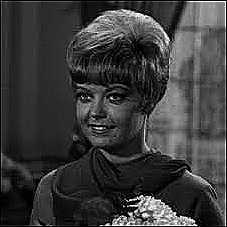

In [23]:
# Image Sharpen
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

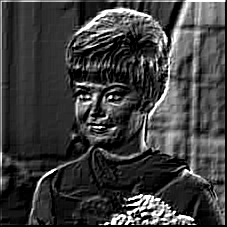

In [67]:
# Image Emboss
kernel_emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

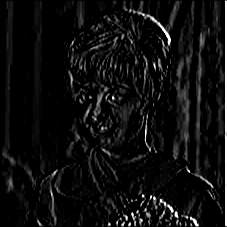

In [32]:
# Image Left Sobel Edge Detection
kernel_left_sobel_edge_detection = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

cv2_imshow(convolution2d(img_gray, kernel_left_sobel_edge_detection, 1, 2))

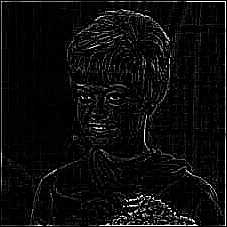

In [33]:
# Image Canny Edge Detection
kernel_canny_edge_detection = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

cv2_imshow(convolution2d(img_gray, kernel_canny_edge_detection, 1, 2))

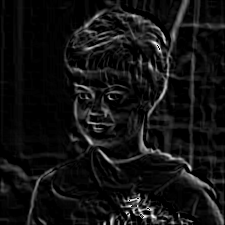

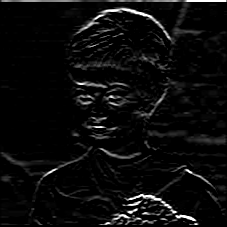

In [69]:
# Image Prewitt Edge Detection
img_gaussian = cv2.GaussianBlur(img_gray,(3,3),0)

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)

prewitt = img_prewittx + img_prewitty

cv2_imshow(prewitt)

# Cara 2
kernel_prewitt = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

print()
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

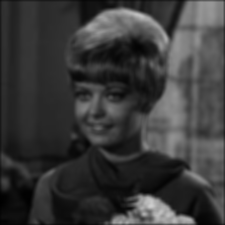

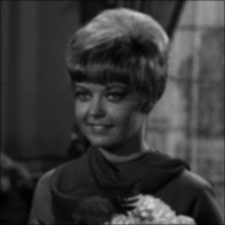

In [74]:
# Image 5 x 5 Gaussian Blur
kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

# Cara 2
kernel_5x5_gaussian_blur = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

print()
cv2_imshow(convolution2d(img_gray, (1/256 * kernel_5x5_gaussian_blur), 1, 2))

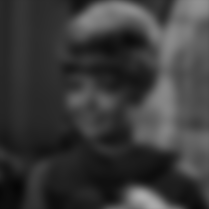

In [37]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

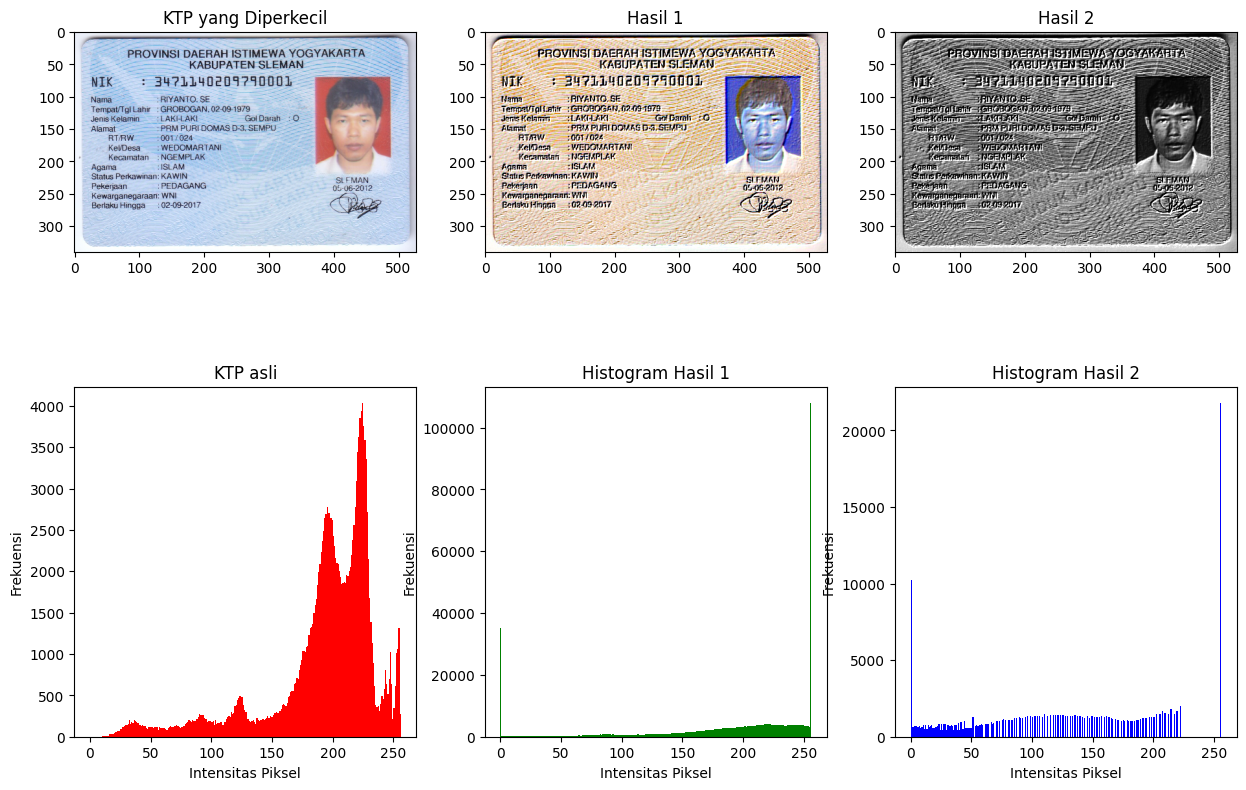

In [129]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp.png')

# Efek Sharpening
def Emboss(gambar):
    kernel_emboss = np.array([[-2, -1, -0], [-1, 1, 1], [0, 1, 2]])
    return cv2.filter2D(gambar, -1, kernel_emboss)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Emboss(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Emboss
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

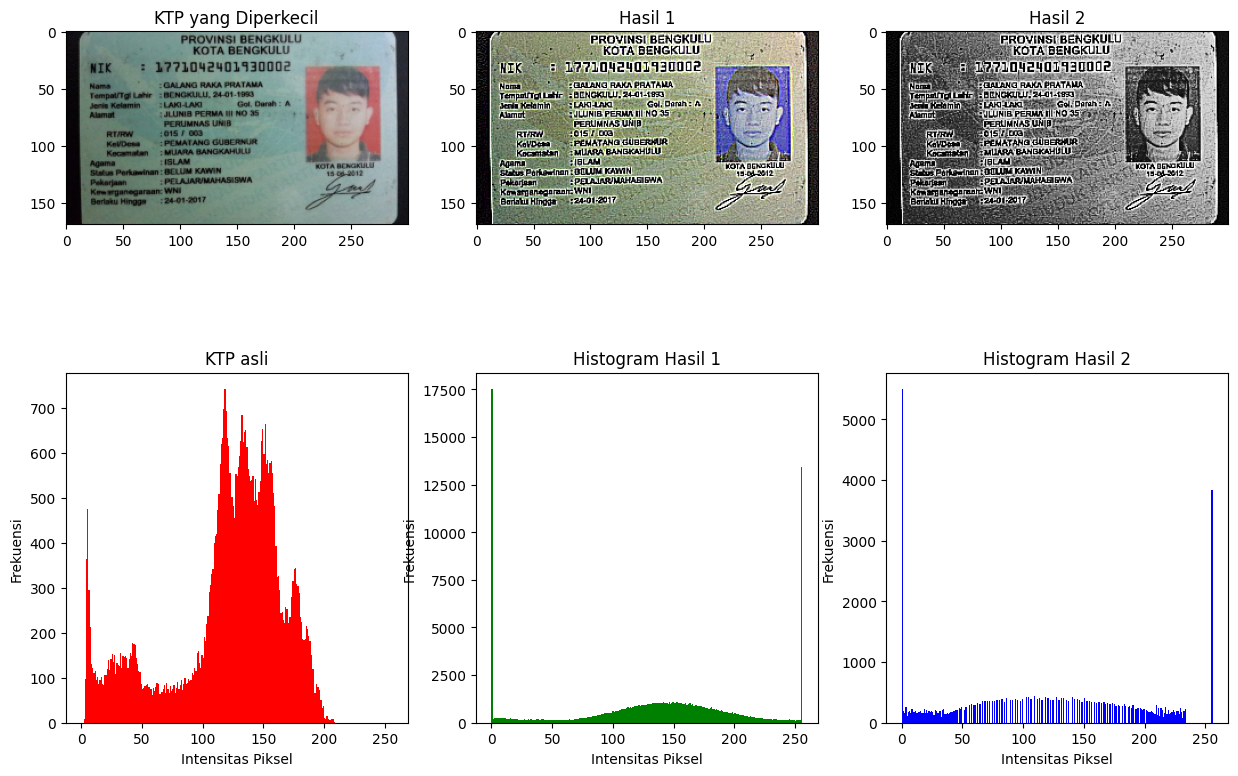

In [128]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp1.png')

# Efek Sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

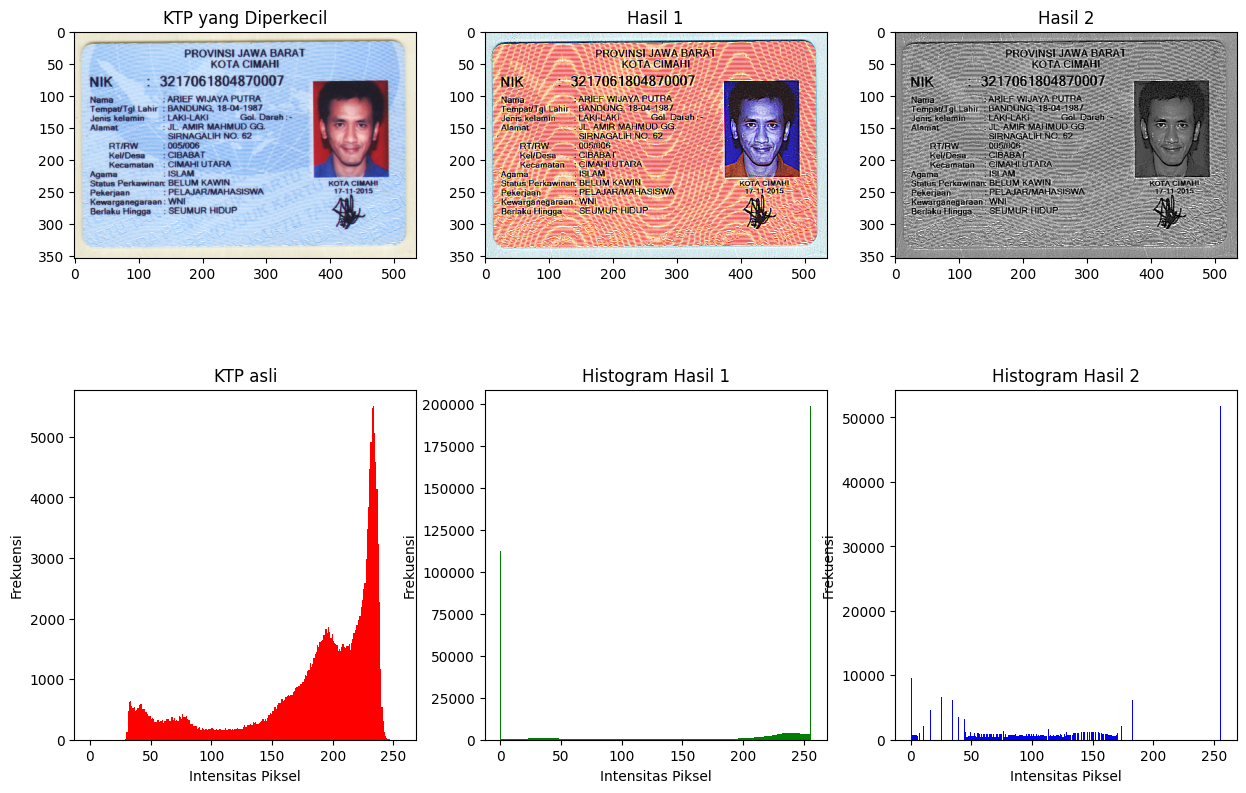

In [97]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp2.png')

# Efek Sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

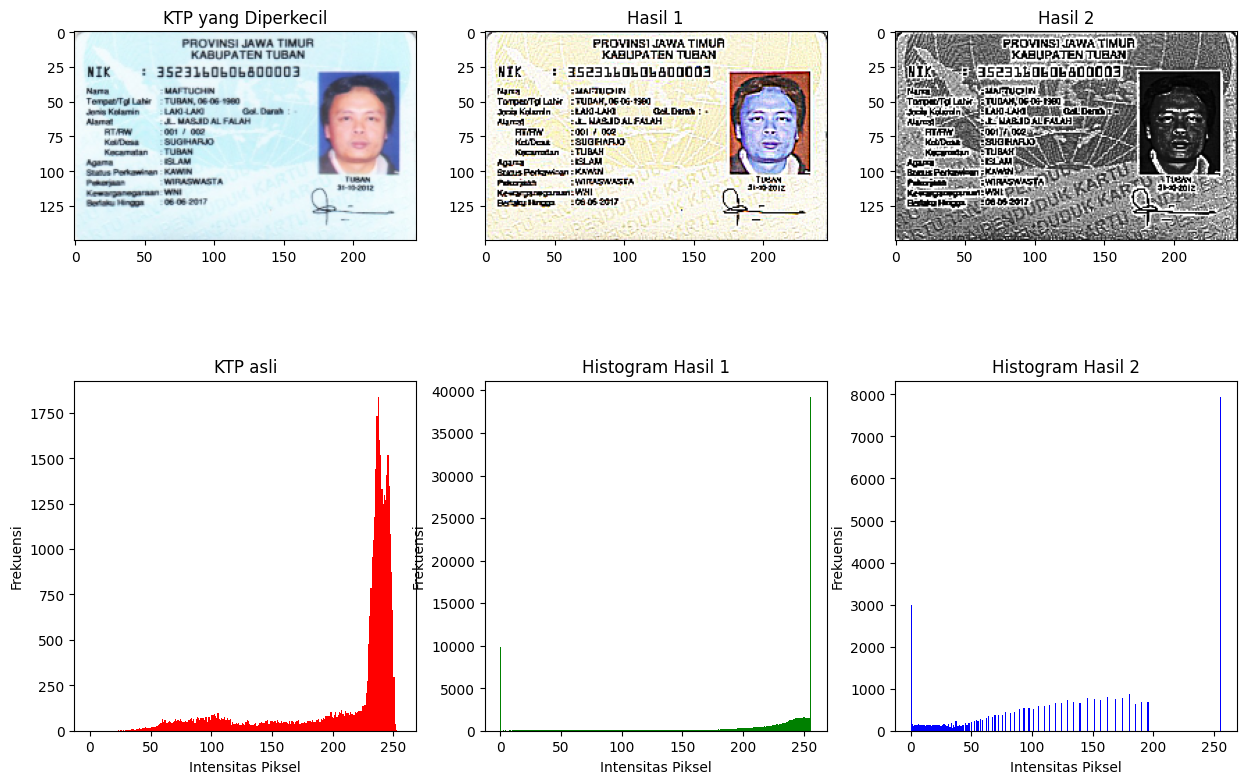

In [98]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp4.png')

# Efek Sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

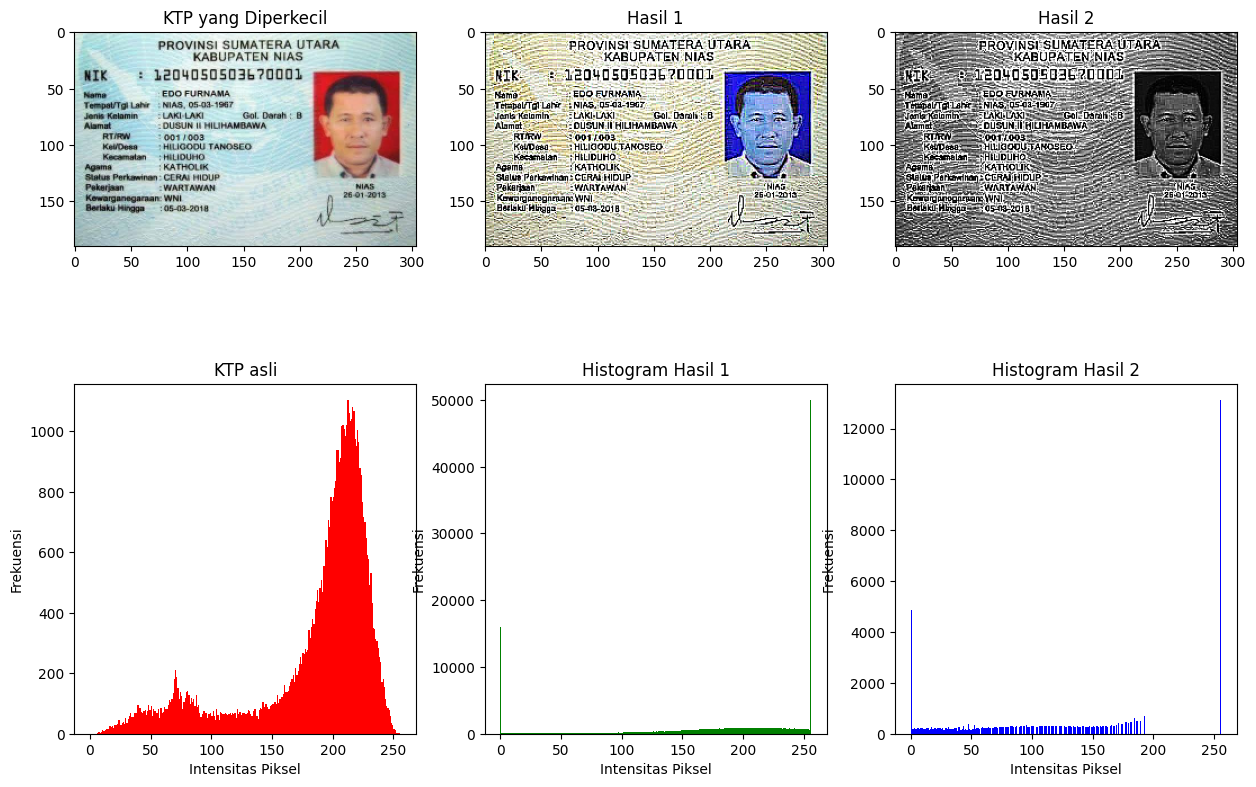

In [99]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp5.png')

# Efek Sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

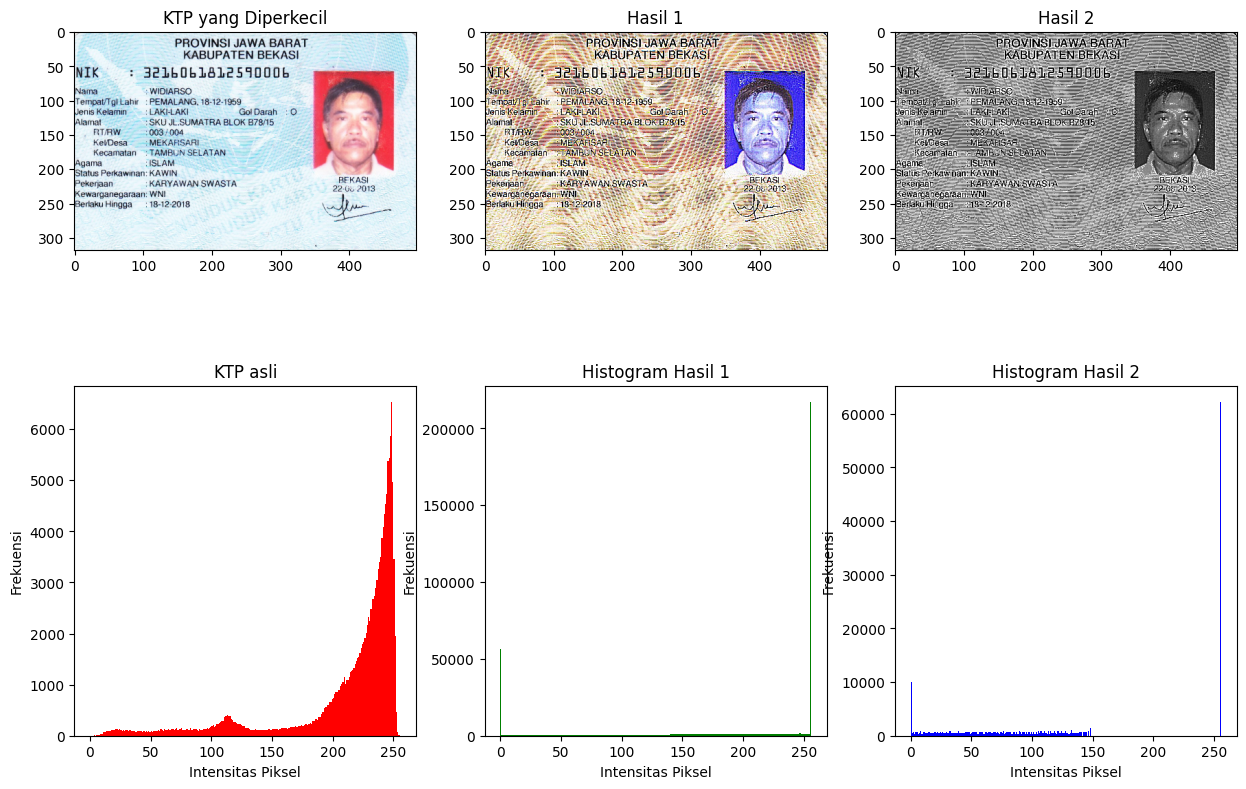

In [100]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/ktp6.png')

# Efek Sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()

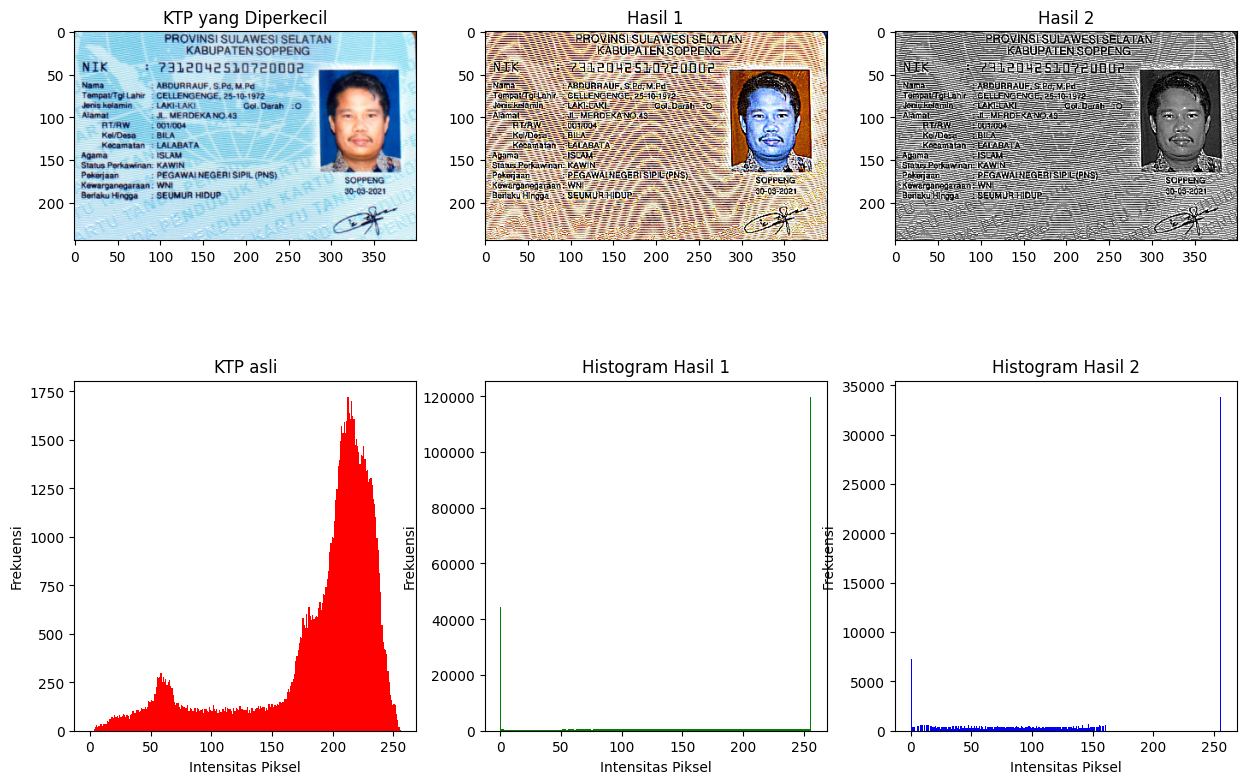

In [105]:
gambar = cv2.imread( '/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

# Efek Sharpening
def Sharpening(gambar):
    kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(gambar, -1, kernel_sharpen)

# Equalisasi histogram
def HistogramEqualization(gambar):
    gambar_gray = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
    equalized_gambar = cv2.equalizeHist(gambar_gray)
    return equalized_gambar

# Resizing gambar
ktp_gambar_resized = cv2.resize(gambar, (0, 0), fx=0.5, fy=0.5)

# Menerapkan efek sharpening
result_sharpened = Sharpening(ktp_gambar_resized)

# Melakukan equalisasi histogram
result_equalized = HistogramEqualization(result_sharpened)

# Menampilkan gambar
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Menampilkan gambar asli
axs[0, 0].imshow(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('KTP yang Diperkecil')

# Gambar Efek Sharpening
axs[0, 1].imshow(result_sharpened, cmap='gray')
axs[0, 1].set_title('Hasil 1')

# Gambar Diequalisasi
axs[0, 2].imshow(result_equalized, cmap='gray')
axs[0, 2].set_title('Hasil 2')

# Histogram gambar asli
axs[1, 0].hist(cv2.cvtColor(ktp_gambar_resized, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=[0,256], color='r')
axs[1, 0].set_title('KTP asli')
axs[1, 0].set_xlabel('Intensitas Piksel')
axs[1, 0].set_ylabel('Frekuensi')

# Histogram Efek Sharpening
axs[1, 1].hist(result_sharpened.ravel(), bins=256, range=[0,256], color='g')
axs[1, 1].set_title('Histogram Hasil 1')
axs[1, 1].set_xlabel('Intensitas Piksel')
axs[1, 1].set_ylabel('Frekuensi')

# Histogram Diequalisasi
axs[1, 2].hist(result_equalized.ravel(), bins=256, range=[0,256], color='b')
axs[1, 2].set_title('Histogram Hasil 2')
axs[1, 2].set_xlabel('Intensitas Piksel')
axs[1, 2].set_ylabel('Frekuensi')

plt.show()